In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('amplificador.dat')
data

,mV
0,7521.2
1,7556.1
2,7478.0
3,7495.1
4,7487.3
...,...
195,7490.7
196,7544.2
197,7487.1
198,7455.1


In [4]:
voltages = data['mV']

In [5]:
#Cálculo del valor medio
voltages.mean()

7501.8

In [6]:
#Cálculo de desviación estandar
voltages.std()

26.810389495951405

In [52]:
#Creación del histograma de frecuencias con dV=2.5mV y dV=10mV
frequencys1, limits1 = np.histogram(voltages, bins=int((voltages.max()-voltages.min())/2.5))
frequencys2, limits2 = np.histogram(voltages, bins=int((voltages.max()-voltages.min())/10))

zero = np.array([0])

frequencys1 = np.concatenate((zero, frequencys1, zero))
limits1 = np.concatenate((limits1[0:1], limits1))

frequencys2 = np.concatenate((zero, frequencys2, zero))
limits2 = np.concatenate((limits2[0:1], limits2))

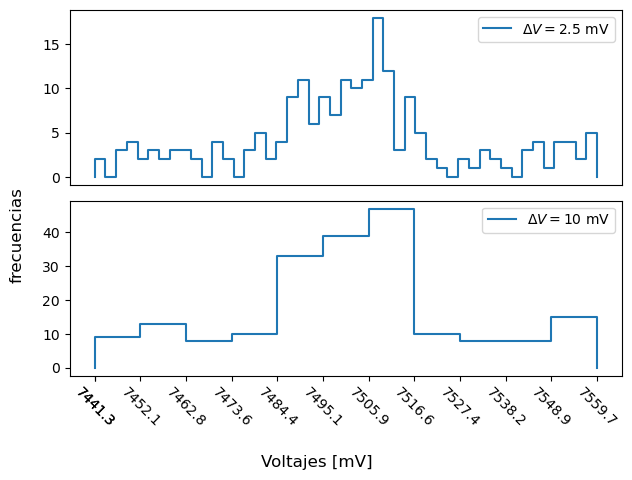

In [57]:
#Plotting
fig = plt.figure()
fig.supylabel('frecuencias')
fig.supxlabel('Voltajes [mV]')

ax1 = fig.add_subplot(2,1,1)
ax1.plot(limits1, frequencys1, drawstyle='steps-post', label=r'$\Delta V = 2.5$ mV')
ax1.set_xticks([])
ax1.legend()

ax2 = fig.add_subplot(2,1,2)
ax2.plot(limits2, frequencys2, drawstyle='steps-post', label=r'$\Delta V = 10$ mV')
ax2.set_xticks(limits2)
ax2.tick_params(axis='x', labelrotation = -45)
ax2.legend()

fig.tight_layout()
fig.savefig('voltage_hist.png')

In [82]:
#Media y desviación estandar a partir de los histogramas
Vmedio1 = (limits1[1:-1]+limits1[2:])/2
Vmedio2 = (limits2[1:-1]+limits2[2:])/2

mu1 = np.dot(frequencys1[1:-1], Vmedio1)/np.sum(frequencys1[1:-1])
mu2 = np.dot(frequencys2[1:-1], Vmedio2)/np.sum(frequencys2[1:-1])

sigma1 = np.sqrt(np.dot(frequencys1[1:-1], (Vmedio1-mu1)**2)/np.sum(frequencys1[1:-1]))
sigma2 = np.sqrt(np.dot(frequencys2[1:-1], (Vmedio2-mu2)**2)/np.sum(frequencys2[1:-1]))

print(f'mu_1 = {mu1} mv \nsig_1 = {sigma1} mv \nmu_2 = {mu2} mv \nsig_2 = {sigma2} mv')

mu_1 = 7501.772170212765 mv 
sig_1 = 26.67801024558702 mv 
mu_2 = 7501.791636363636 mv 
sig_2 = 26.770096295482723 mv
